In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [59]:
df=pd.read_csv("loan_sanction_test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


check information

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [61]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


check null values

In [62]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

drop columns

In [63]:
df.drop(columns=["Loan_ID"],inplace=True)

In [64]:
df[df["Gender"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [10]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

fill null values

In [11]:
# fill with mode
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [12]:
# fill with median
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())

#distribution ofkey numeric variables.

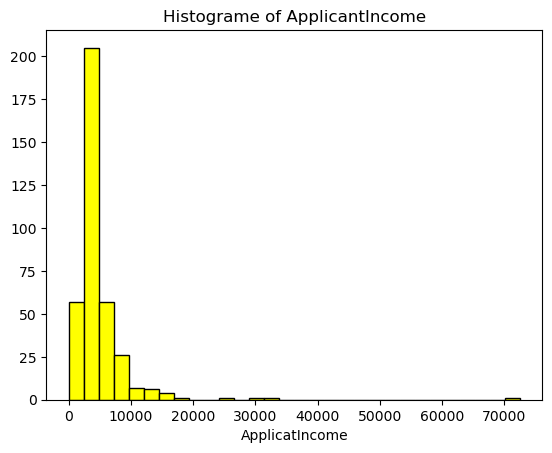

In [13]:
plt.hist(df['ApplicantIncome'],bins=30,edgecolor="Black",color="yellow")
plt.title("Histograme of ApplicantIncome")
plt.xlabel("ApplicatIncome")
plt.show()

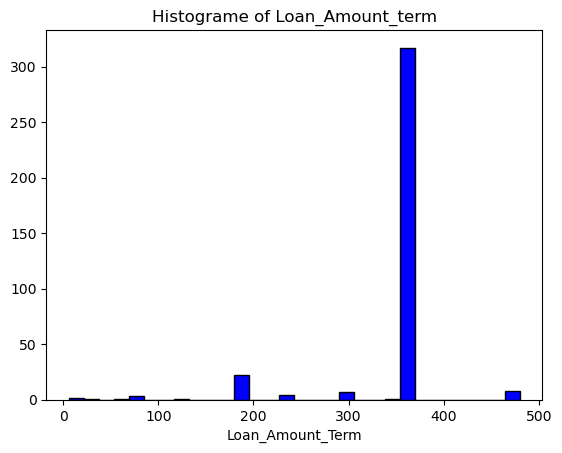

In [14]:
plt.hist(df['Loan_Amount_Term'],bins=30,edgecolor="Black",color="blue")
plt.title("Histograme of Loan_Amount_term")
plt.xlabel("Loan_Amount_Term")
plt.show()

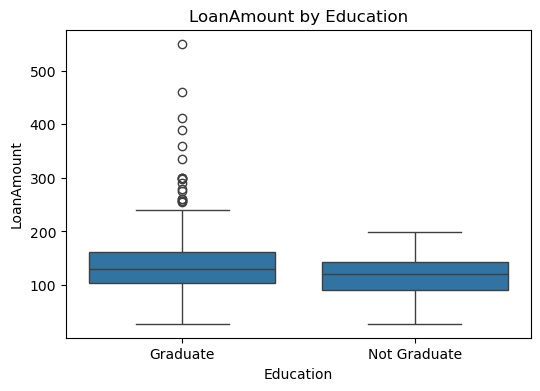

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Education", y="LoanAmount", data=df)
plt.title("LoanAmount by Education")
plt.show()

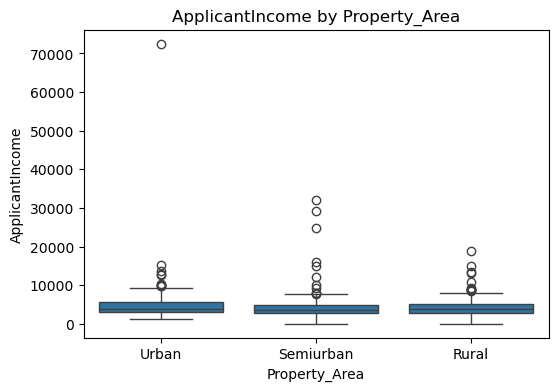

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Property_Area", y="ApplicantIncome", data=df)
plt.title("ApplicantIncome by Property_Area")
plt.show()


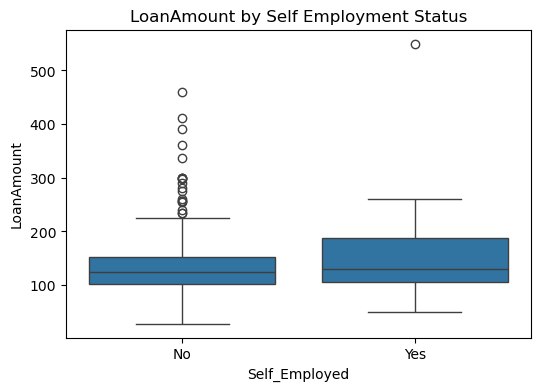

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Self_Employed", y="LoanAmount", data=df)
plt.title("LoanAmount by Self Employment Status")
plt.show()

In [18]:
df.select_dtypes(include=["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [19]:
df["Gender"].value_counts()

Gender
Male      297
Female     70
Name: count, dtype: int64

#Visualize the frequency distributionof categorical variables.

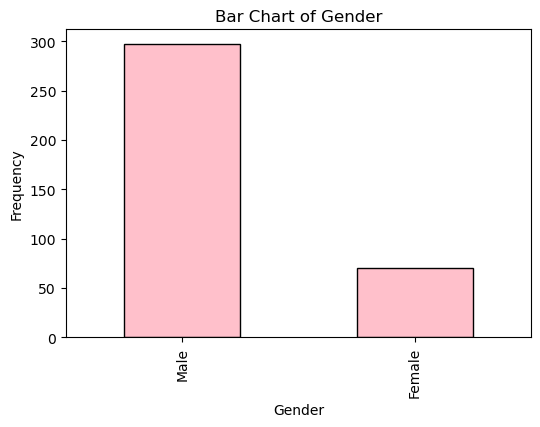

In [21]:
plt.figure(figsize=(6,4))
df["Gender"].value_counts().plot(kind="bar", edgecolor="black",color="pink")
plt.title("Bar Chart of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

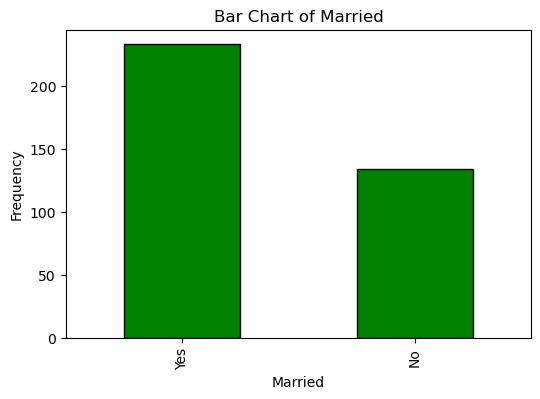

In [22]:
plt.figure(figsize=(6,4))
df["Married"].value_counts().plot(kind="bar", edgecolor="Black",color="Green")
plt.title("Bar Chart of Married")
plt.xlabel("Married")
plt.ylabel("Frequency")
plt.show()

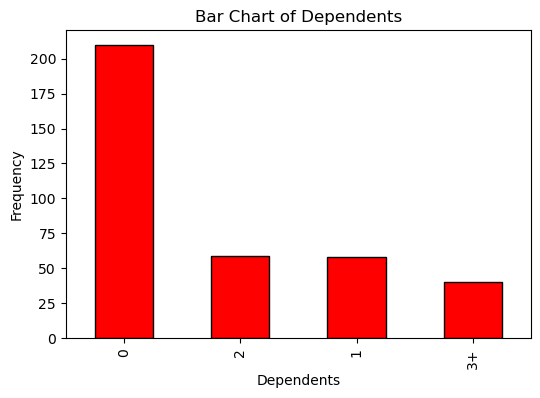

In [23]:
plt.figure(figsize=(6,4))
df["Dependents"].value_counts().plot(kind="bar", edgecolor="black",color="r")
plt.title("Bar Chart of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Frequency")
plt.show()

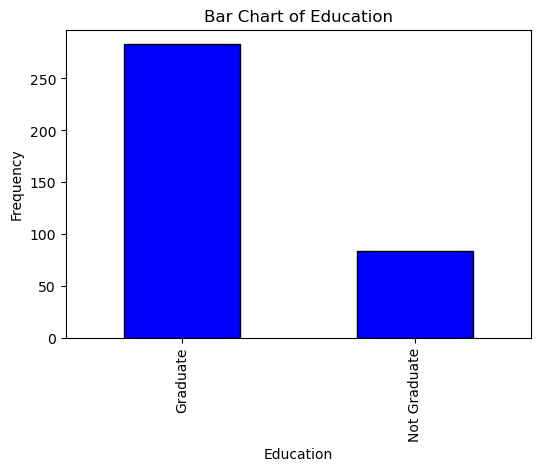

In [24]:
plt.figure(figsize=(6,4))
df["Education"].value_counts().plot(kind="bar", edgecolor="black",color="blue")
plt.title("Bar Chart of Education")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

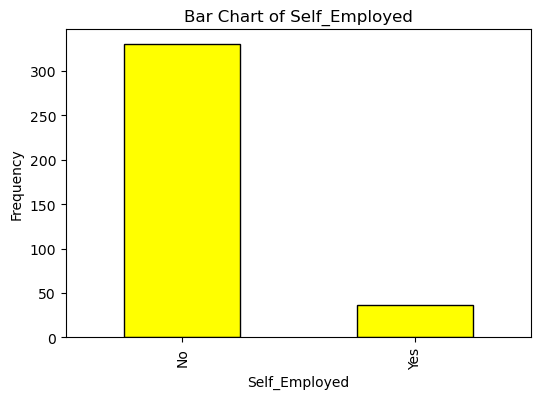

In [25]:
plt.figure(figsize=(6,4))
df["Self_Employed"].value_counts().plot(kind="bar", edgecolor="black",color="yellow")
plt.title("Bar Chart of Self_Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Frequency")
plt.show()

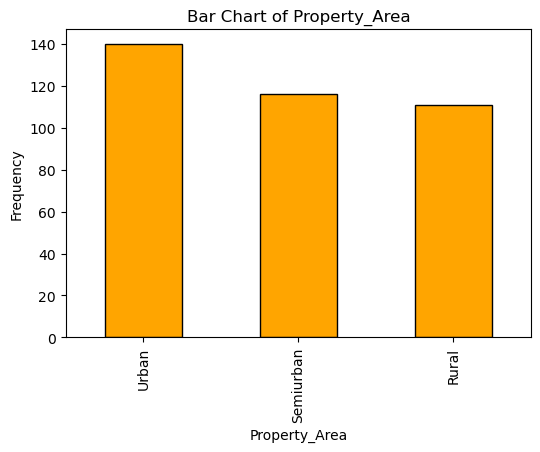

In [26]:
plt.figure(figsize=(6,4))
df["Property_Area"].value_counts().plot(kind="bar", edgecolor="black",color="orange")
plt.title("Bar Chart of Property_Area")
plt.xlabel("Property_Area")
plt.ylabel("Frequency")
plt.show()

In [27]:
print(df["Property_Area"].value_counts())

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64


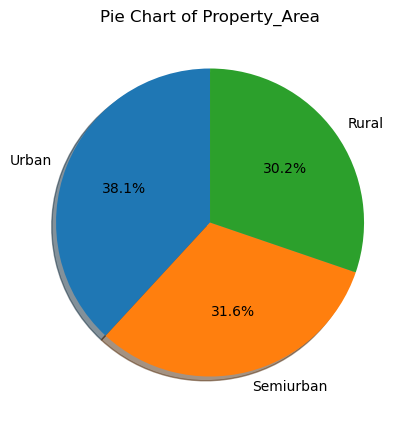

In [28]:
# Pie Chart (Property_Area)
plt.figure(figsize=(5,5))
df["Property_Area"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Pie Chart of Property_Area")
plt.ylabel("")
plt.show()

In [32]:
cate_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

In [33]:
numerical_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

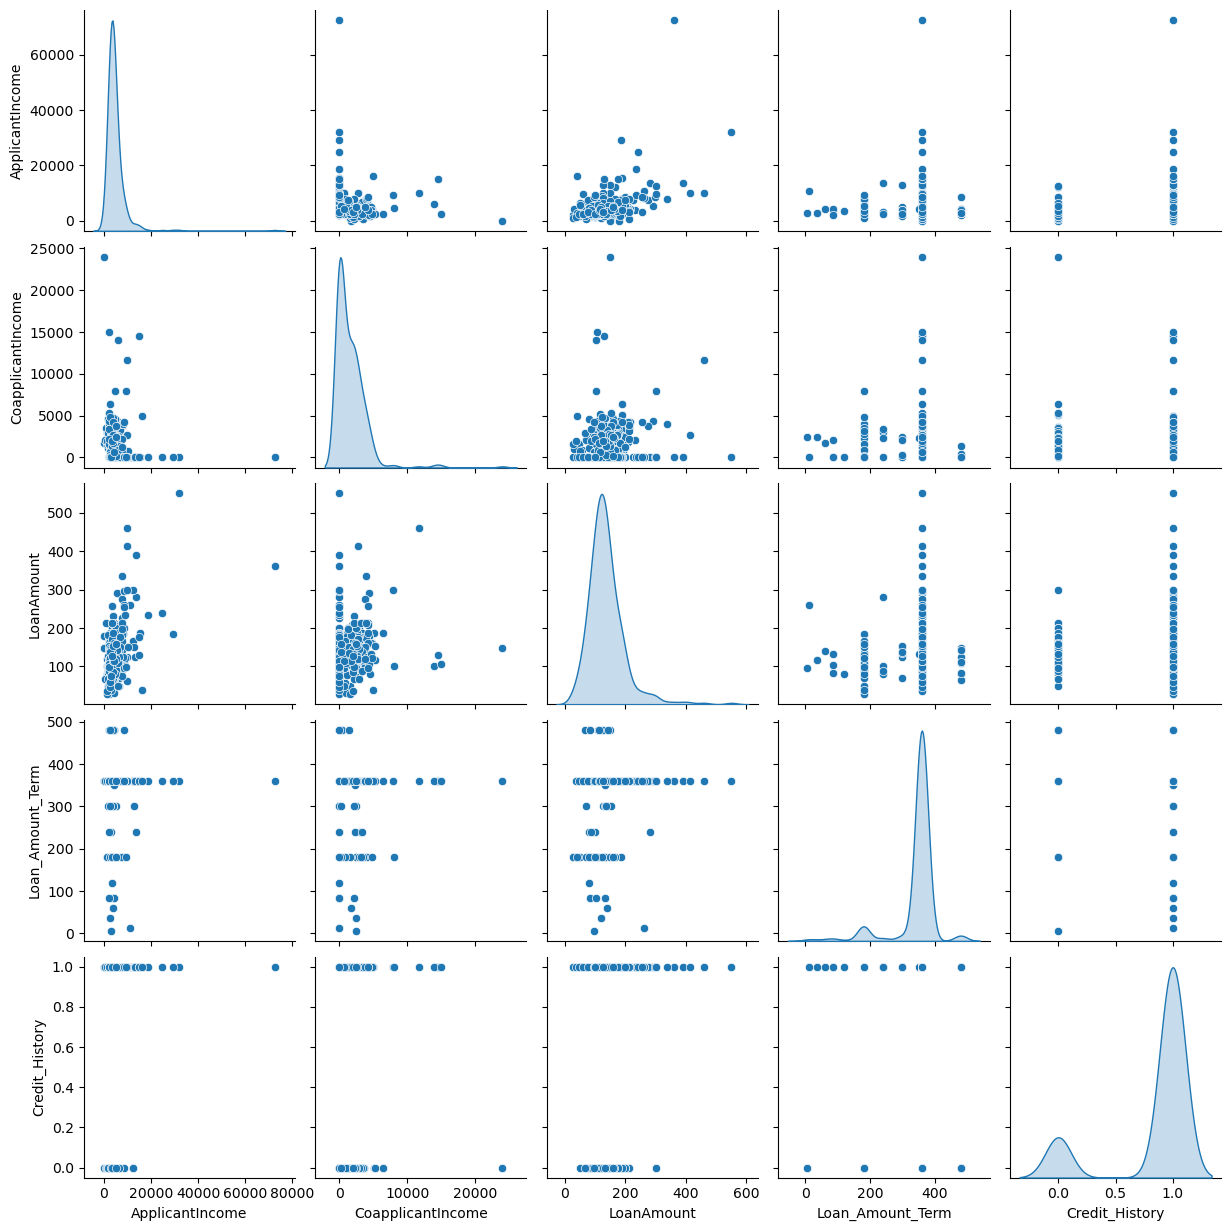

In [34]:
sns.pairplot(df[numerical_col],diag_kind="kde") 
plt.show()

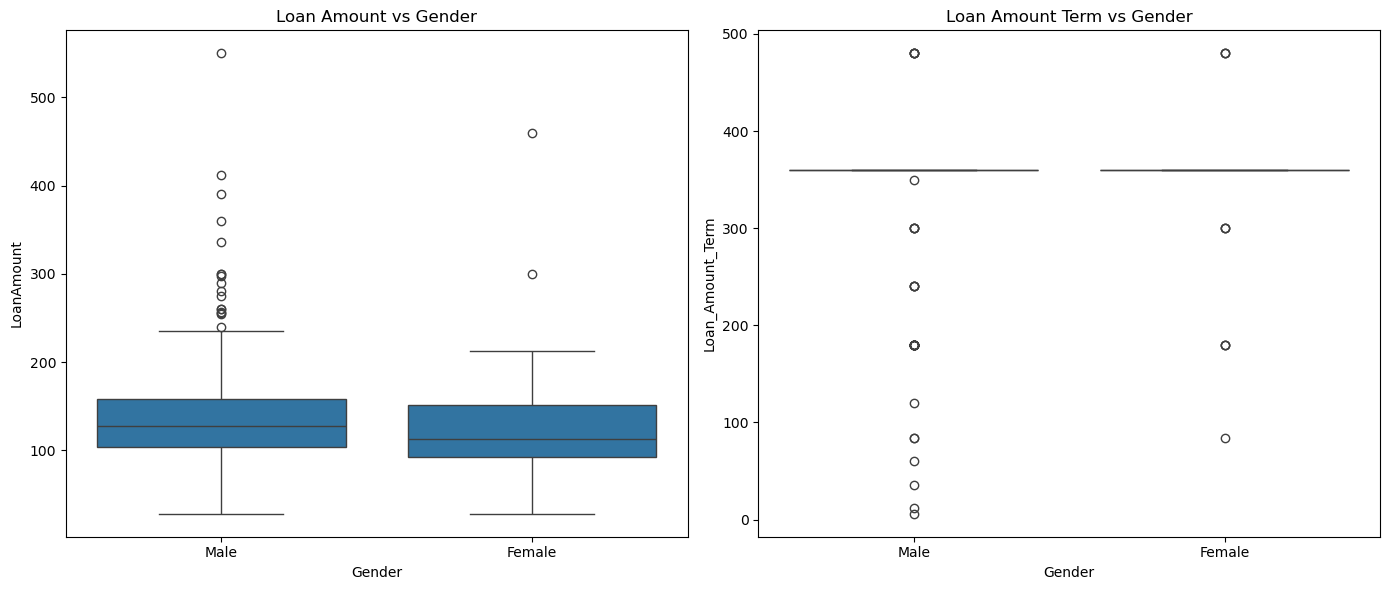

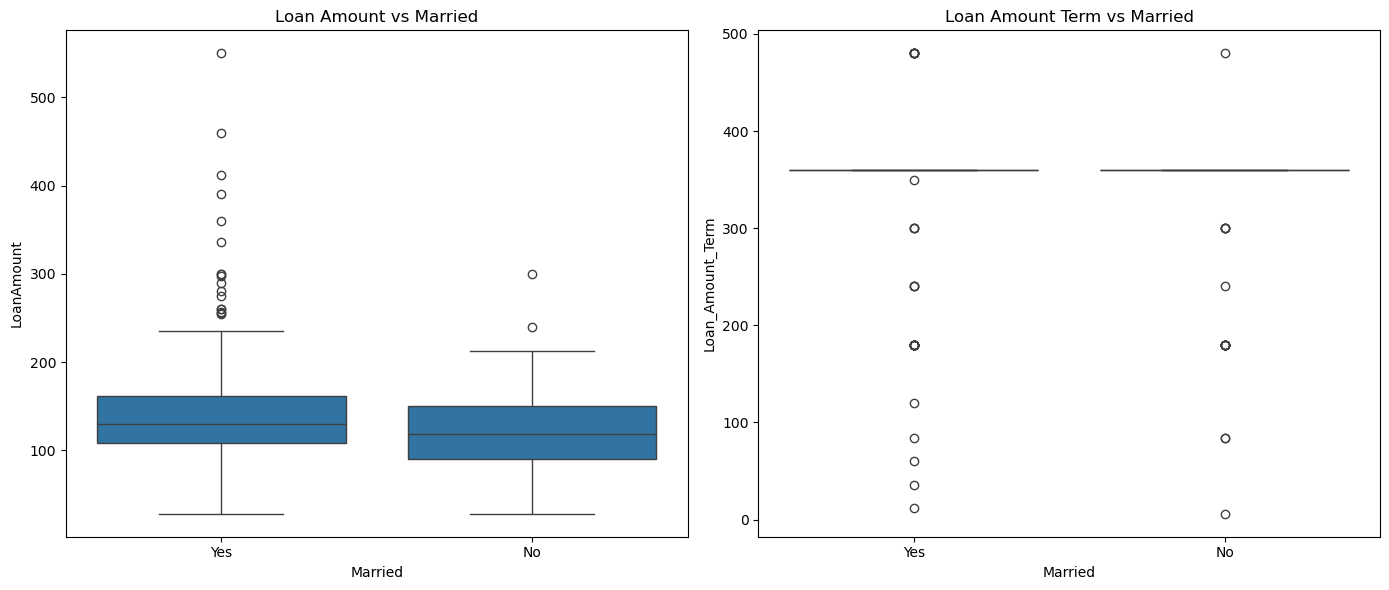

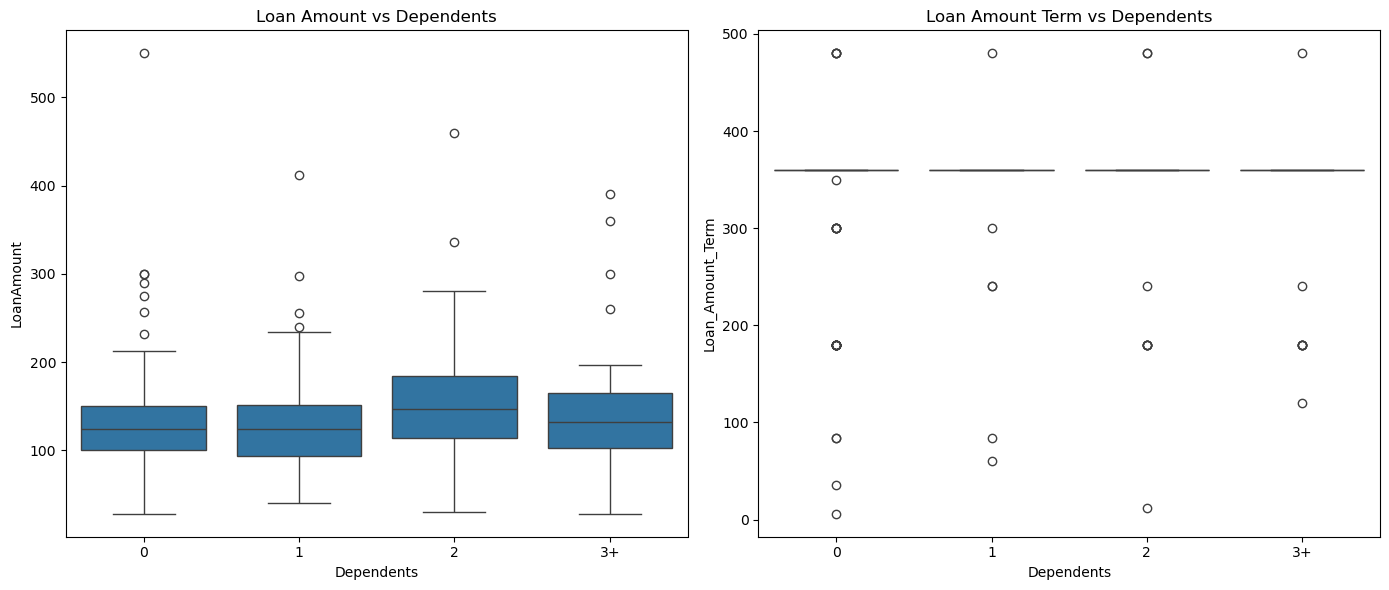

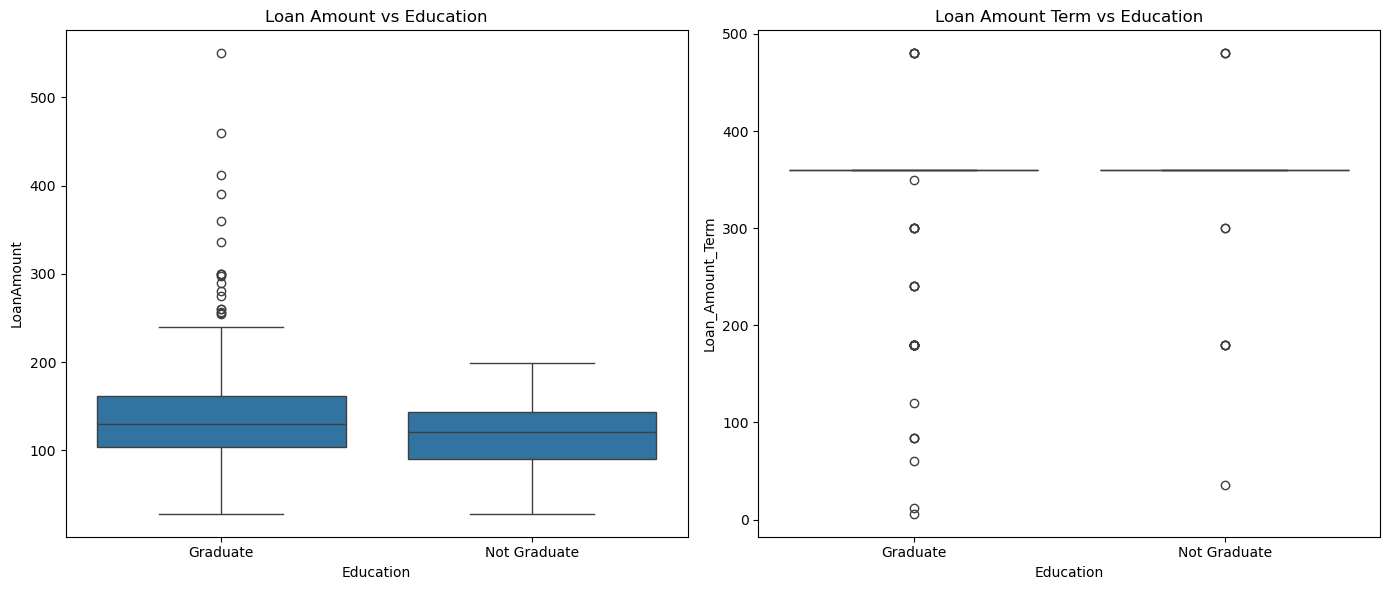

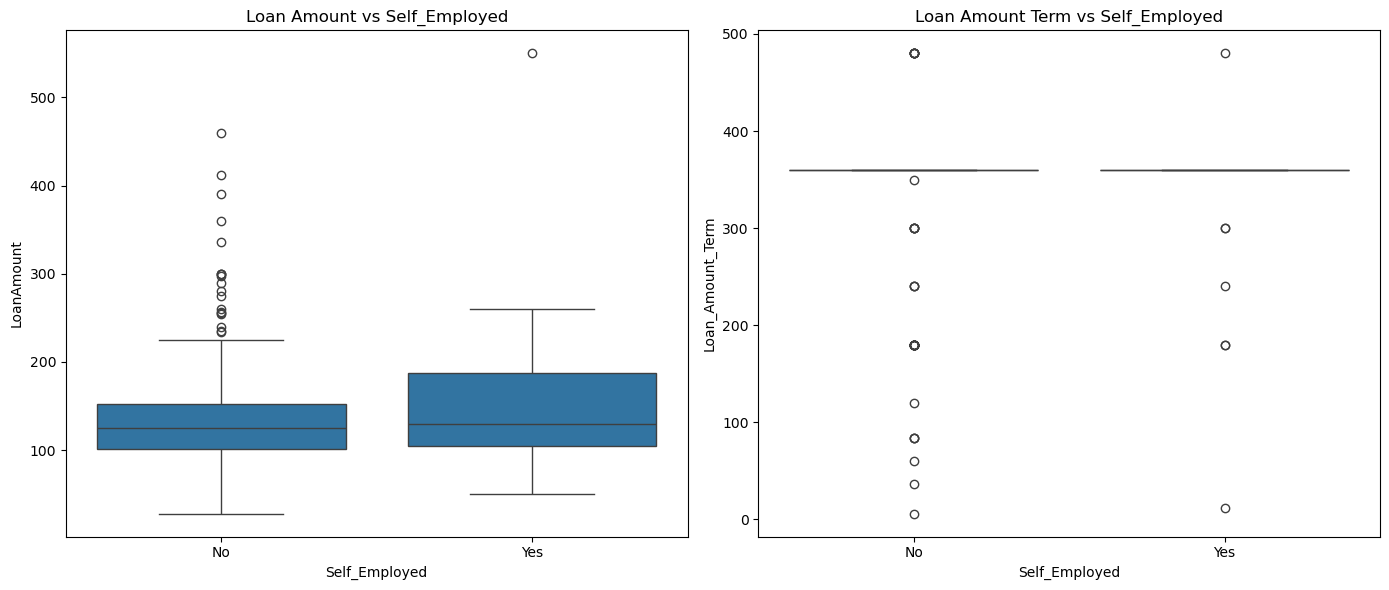

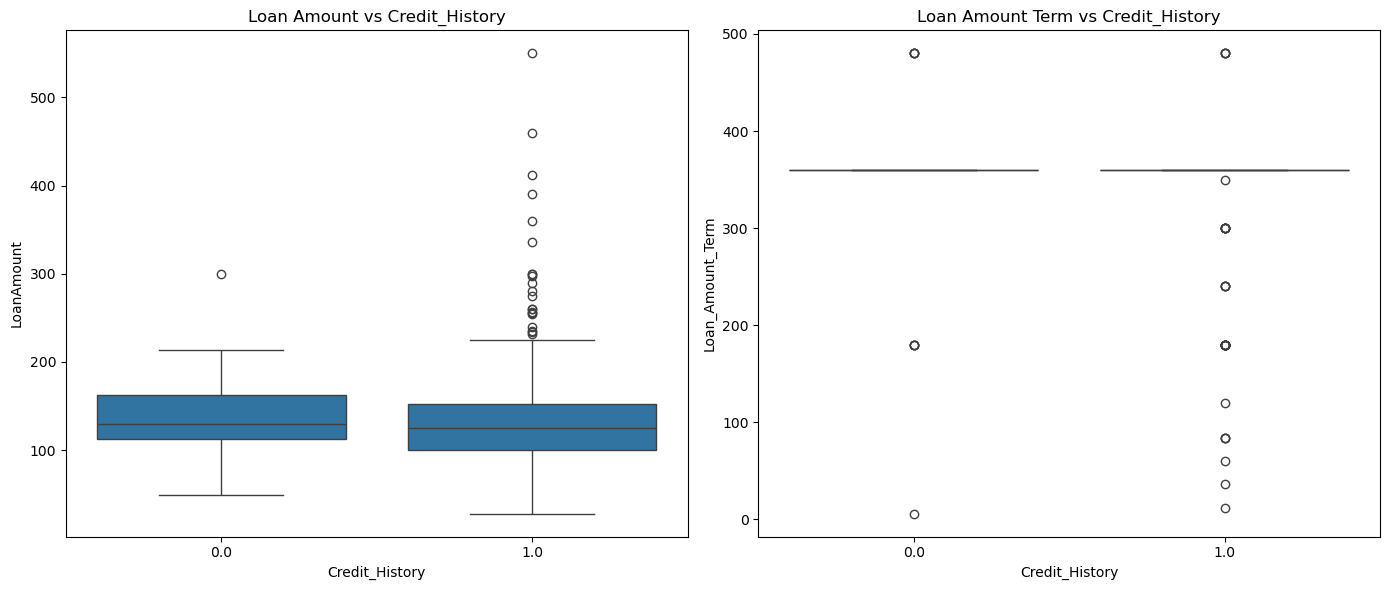

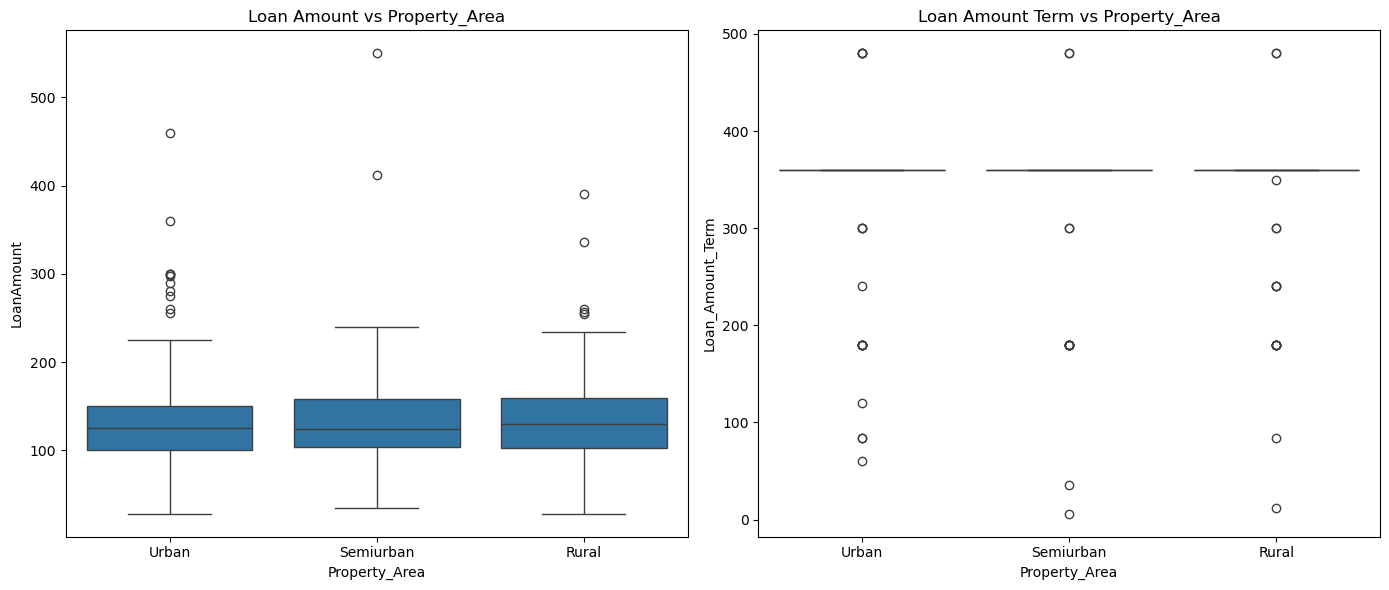

In [35]:
for col in cate_cols: 
    fig, axes= plt.subplots(1,2,figsize=(14,6)) 
# Boxplot for Loan Amount 
    sns.boxplot(x = col, y = "LoanAmount", data = df, ax = axes[0]) 
    axes[0].set_title(f'Loan Amount vs {col}')  
# Boxplot for Loan_Amount_Term 
    sns.boxplot(x = col, y= 'Loan_Amount_Term', data= df, ax= axes[1])
    axes[1].set_title(f'Loan Amount Term vs {col}') 
    plt.tight_layout()
    plt.show()

#Multivariate Analysis

In [37]:
numerical_cols = ['Dependents','ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [44]:

for col in numerical_cols:
    df[col] = df[col].replace('[^0-9.-]', '', regex=True)  # Remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

                   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents           1.000000         0.138004          -0.050024    0.134761   
ApplicantIncome      0.138004         1.000000          -0.110335    0.488737   
CoapplicantIncome   -0.050024        -0.110335           1.000000    0.150034   
LoanAmount           0.134761         0.488737           0.150034    1.000000   
Loan_Amount_Term    -0.053460         0.023319          -0.008633    0.091867   
Credit_History      -0.051705         0.094944          -0.058004   -0.012932   

                   Loan_Amount_Term  Credit_History  
Dependents                -0.053460       -0.051705  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.091867       -0.012932  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


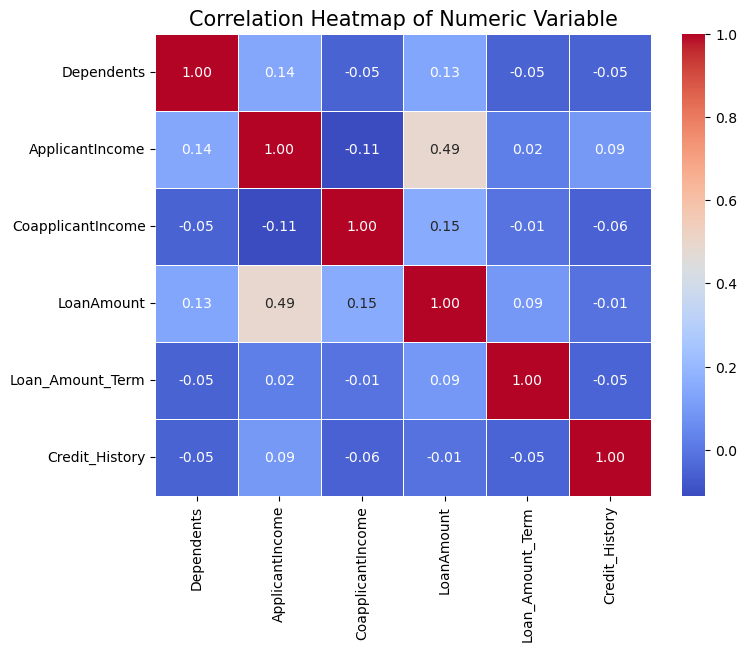

In [45]:
# heat map visualization
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', linewidths= 0.5, fmt='.2f') 
plt.title('Correlation Heatmap of Numeric Variable', fontsize =15) 
plt.show()

In [46]:
cat_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

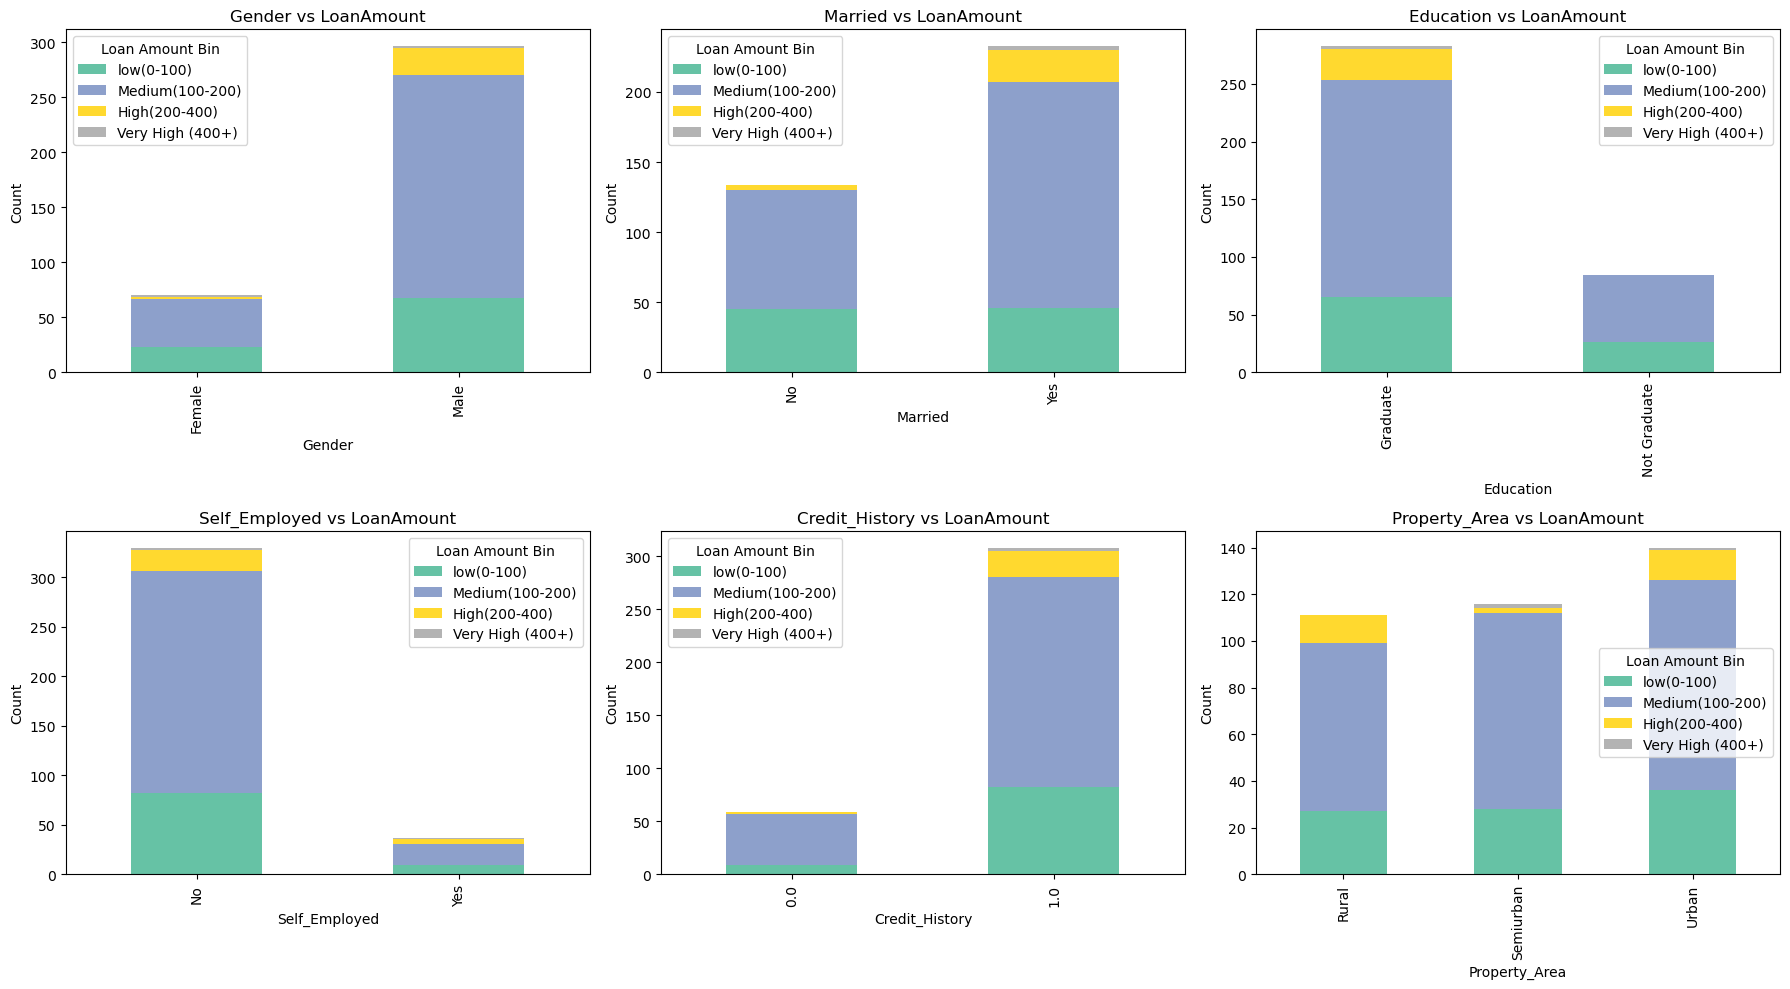

In [47]:
df['LoanAmount_Bin']= pd.cut(df['LoanAmount'], bins = [0,100,200,400,700], labels=['low(0-100)','Medium(100-200)','High(200-400)','Very High (400+)']) 

fig, axes= plt.subplots(2,3, figsize = (18,10))

for i, col in enumerate(cat_cols): 
    ax = axes[i//3, i%3]
    cross_tab= pd.crosstab(df[col], df['LoanAmount_Bin'])
    cross_tab.plot(kind = 'bar', stacked = True, ax= ax, colormap = 'Set2')
    ax.set_title(f'{col} vs LoanAmount') 
    ax.set_ylabel('Count')
    ax.set_xlabel(col)
    ax.legend(title= 'Loan Amount Bin')
    
plt.tight_layout()
plt.show()

#Geospatial Analysis

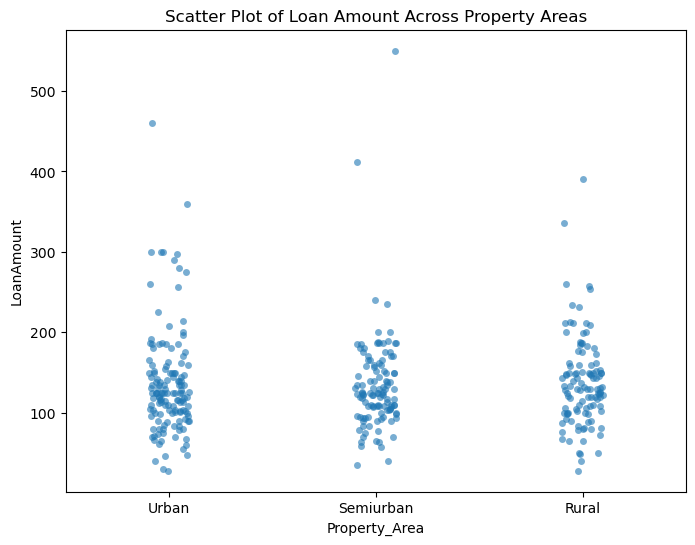

In [49]:
plt.figure(figsize=(8,6)) 
sns.stripplot(x = 'Property_Area', y='LoanAmount', data= df, jitter=True, alpha = 0.6) 
plt.title('Scatter Plot of Loan Amount Across Property Areas')
plt.show()

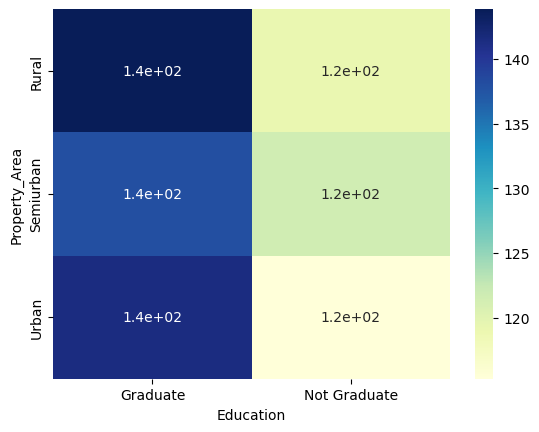

In [50]:
pivot = df.pivot_table(values= 'LoanAmount', index='Property_Area',columns='Education', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.show()

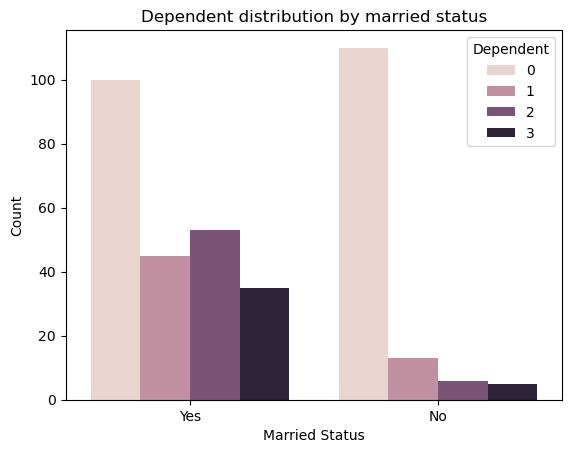

In [51]:
sns.countplot(data=df, x= df['Married'], hue= df['Dependents'])
plt.title('Dependent distribution by married status')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.legend(title= 'Dependent')
plt.show()

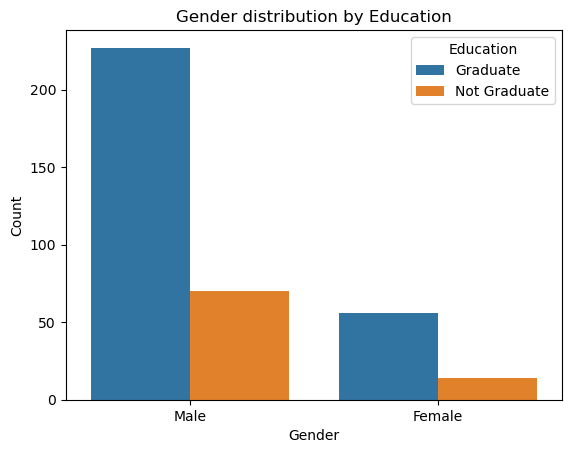

In [52]:
sns.countplot(data=df, x= df['Gender'], hue= df['Education'])
plt.title('Gender distribution by Education')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title= 'Education')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1244\1755352862.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x= df['Gender'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)


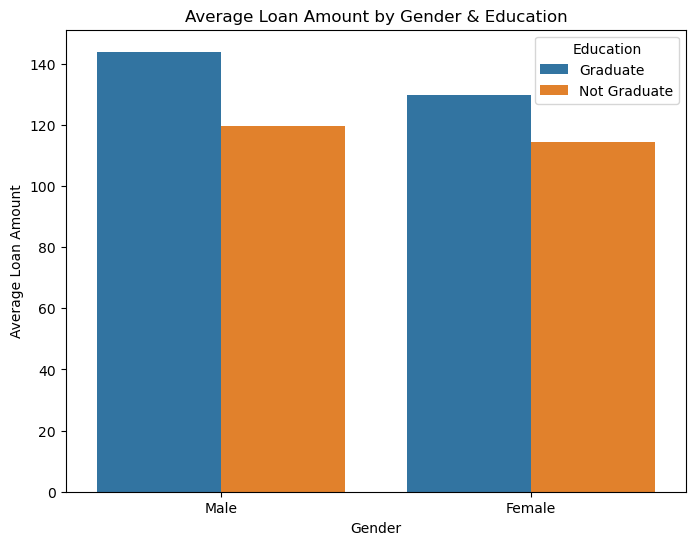

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x= df['Gender'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
plt.title('Average Loan Amount by Gender & Education')
plt.ylabel('Average Loan Amount')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1244\3160436994.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.barplot(data=df, x= df['Property_Area'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)


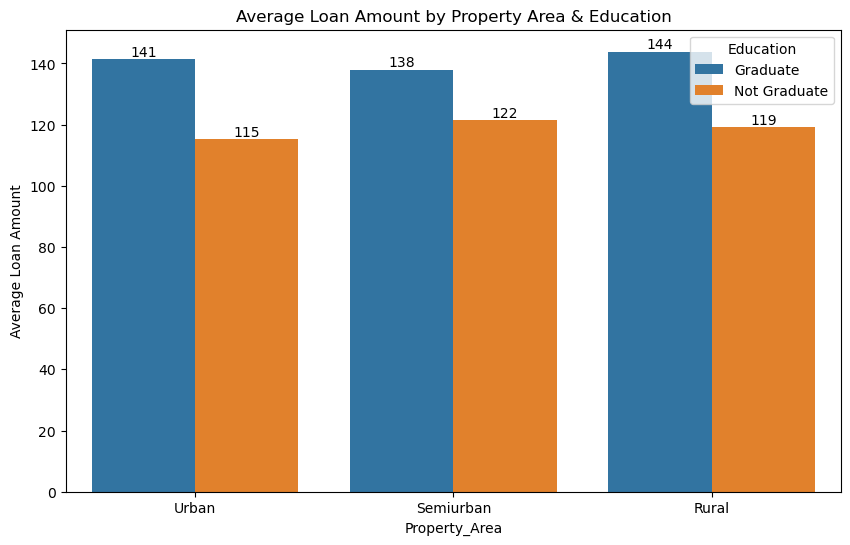

In [54]:
plt.figure(figsize=(10,6))
ax= sns.barplot(data=df, x= df['Property_Area'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
for container in ax.containers: ax.bar_label(container, fmt= '%.0f')
plt.title('Average Loan Amount by Property Area & Education')
plt.ylabel('Average Loan Amount')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1244\1008780591.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.barplot(data=df, x= df['Self_Employed'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)


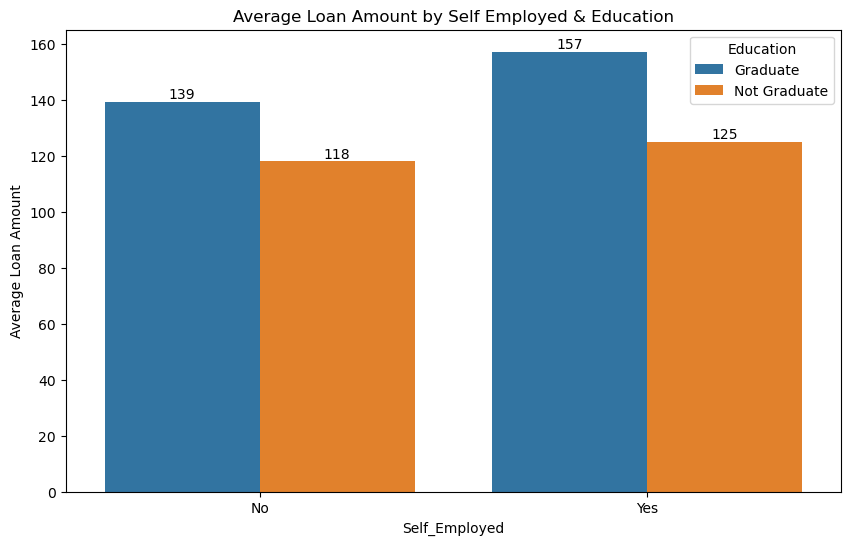

In [55]:
plt.figure(figsize=(10,6))
ax= sns.barplot(data=df, x= df['Self_Employed'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
for container in ax.containers: ax.bar_label(container, fmt= '%.0f')
plt.title('Average Loan Amount by Self Employed & Education')
plt.ylabel('Average Loan Amount')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1244\3847745391.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x = 'Married',y = 'LoanAmount', hue='Education',


<Figure size 1000x600 with 0 Axes>

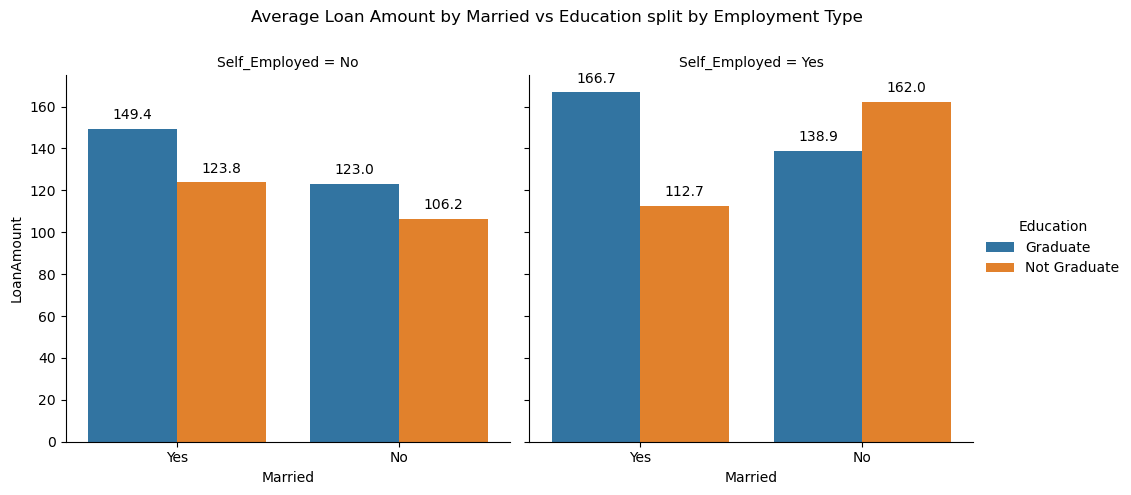

In [56]:
plt.figure(figsize=(10,6))
g = sns.catplot(data=df, x = 'Married',y = 'LoanAmount', hue='Education',
            col='Self_Employed',kind='bar', estimator=np.mean, ci=None, height=5, aspect=1) 
g.fig.subplots_adjust(top=0.85)
#g.fig.subplots_adjust(top = 0.85) 
g.fig.suptitle('Average Loan Amount by Married vs Education split by Employment Type')

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate( format(p.get_height(), '.1f'),
                    (p.get_x()+ p.get_width()/2., p.get_height()),
                    ha= 'center', va= 'bottom', fontsize = 10, color  = 'black',
                   xytext= (0,5), textcoords='offset points')
plt.show()